In [2]:
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split,learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda,MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D,MaxPool2D,MaxPooling2D,AvgPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from imblearn.over_sampling import RandomOverSampler

In [3]:
train_dir = "../input/kermany2018/OCT2017 /train"
test_dir = "../input/kermany2018/OCT2017 /test"

In [4]:
for dirpath, dirname, filenames in os.walk("../input/kermany2018/OCT2017 "):
    print(f"There are {len(dirname)} directories and there are {len(filenames)} images in {dirpath}")

There are 3 directories and there are 0 images in ../input/kermany2018/OCT2017 
There are 4 directories and there are 0 images in ../input/kermany2018/OCT2017 /val
There are 0 directories and there are 8 images in ../input/kermany2018/OCT2017 /val/DRUSEN
There are 0 directories and there are 8 images in ../input/kermany2018/OCT2017 /val/CNV
There are 0 directories and there are 8 images in ../input/kermany2018/OCT2017 /val/NORMAL
There are 0 directories and there are 8 images in ../input/kermany2018/OCT2017 /val/DME
There are 4 directories and there are 0 images in ../input/kermany2018/OCT2017 /test
There are 0 directories and there are 242 images in ../input/kermany2018/OCT2017 /test/DRUSEN
There are 0 directories and there are 242 images in ../input/kermany2018/OCT2017 /test/CNV
There are 0 directories and there are 242 images in ../input/kermany2018/OCT2017 /test/NORMAL
There are 0 directories and there are 242 images in ../input/kermany2018/OCT2017 /test/DME
There are 4 directories

In [6]:
!mkdir "dataset"
!mkdir "dataset/train"
!mkdir "dataset/test"
!mkdir "dataset/train/CNV"
!mkdir "dataset/train/DRUSEN"
!mkdir "dataset/train/DME"
!mkdir "dataset/train/NORMAL"
!mkdir "dataset/test/CNV"
!mkdir "dataset/test/DRUSEN"
!mkdir "dataset/test/DME"
!mkdir "dataset/test/NORMAL"

mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘dataset/train’: File exists
mkdir: cannot create directory ‘dataset/test’: File exists
mkdir: cannot create directory ‘dataset/train/CNV’: File exists
mkdir: cannot create directory ‘dataset/train/DRUSEN’: File exists
mkdir: cannot create directory ‘dataset/train/DME’: File exists
mkdir: cannot create directory ‘dataset/train/NORMAL’: File exists
mkdir: cannot create directory ‘dataset/test/CNV’: File exists
mkdir: cannot create directory ‘dataset/test/DRUSEN’: File exists
mkdir: cannot create directory ‘dataset/test/DME’: File exists
mkdir: cannot create directory ‘dataset/test/NORMAL’: File exists


In [7]:
import shutil
for folder in os.listdir(train_dir):
    for file in os.listdir(train_dir + '/' + folder):
        if folder == "CNV":
            if len(os.listdir("dataset/train/CNV")) < 5000:
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/train/CNV")
            else:
                break
        elif folder == "DRUSEN":
            if len(os.listdir("dataset/train/DRUSEN")) < 5000:
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/train/DRUSEN")
            else:
                break
        elif folder == "DME":
            if len(os.listdir("dataset/train/DME")) < 5000:
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/train/DME")
            else:
                break
        elif folder == "NORMAL":
            if len(os.listdir("dataset/train/NORMAL")) < 5000:
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/train/NORMAL")
            else:
                break

In [8]:
for dirpath, dirname, filenames in os.walk("dataset"):
    print(f"There are {len(dirname)} directories and there are {len(filenames)} images in {dirpath}")

There are 2 directories and there are 0 images in dataset
There are 4 directories and there are 0 images in dataset/train
There are 0 directories and there are 5000 images in dataset/train/NORMAL
There are 0 directories and there are 5000 images in dataset/train/DRUSEN
There are 0 directories and there are 5000 images in dataset/train/DME
There are 0 directories and there are 5000 images in dataset/train/CNV
There are 4 directories and there are 0 images in dataset/test
There are 0 directories and there are 0 images in dataset/test/NORMAL
There are 0 directories and there are 0 images in dataset/test/DRUSEN
There are 0 directories and there are 0 images in dataset/test/DME
There are 0 directories and there are 0 images in dataset/test/CNV


In [9]:
for folder in os.listdir(test_dir):
    for file in os.listdir(test_dir + '/' + folder):
        if folder == "CNV":
                shutil.copy(test_dir + '/' + folder + '/' + file, "dataset/test/CNV")
        elif folder == "DRUSEN":
                shutil.copy(test_dir + '/' + folder + '/' + file, "dataset/test/DRUSEN")
        elif folder == "DME":
                shutil.copy(test_dir + '/' + folder + '/' + file, "dataset/test/DME")
        elif folder == "NORMAL":
                shutil.copy(test_dir + '/' + folder + '/' + file, "dataset/test/NORMAL")

In [10]:
for dirpath, dirname, filenames in os.walk("dataset"):
    print(f"There are {len(dirname)} directories and there are {len(filenames)} images in {dirpath}")

There are 2 directories and there are 0 images in dataset
There are 4 directories and there are 0 images in dataset/train
There are 0 directories and there are 5000 images in dataset/train/NORMAL
There are 0 directories and there are 5000 images in dataset/train/DRUSEN
There are 0 directories and there are 5000 images in dataset/train/DME
There are 0 directories and there are 5000 images in dataset/train/CNV
There are 4 directories and there are 0 images in dataset/test
There are 0 directories and there are 242 images in dataset/test/NORMAL
There are 0 directories and there are 242 images in dataset/test/DRUSEN
There are 0 directories and there are 242 images in dataset/test/DME
There are 0 directories and there are 242 images in dataset/test/CNV


In [15]:
import tensorflow as tf
train_data = tf.keras.preprocessing.image_dataset_from_directory("dataset/train",
                                                                image_size = (227, 227),
                                                                label_mode = "categorical",
                                                                shuffle = True)
test_data = tf.keras.preprocessing.image_dataset_from_directory("dataset/test",
                                                                image_size = (227, 227),
                                                                label_mode = "categorical",
                                                                shuffle = True)
train_data, test_data

Found 20000 files belonging to 4 classes.
Found 968 files belonging to 4 classes.


(<BatchDataset shapes: ((None, 227, 227, 3), (None, 4)), types: (tf.float32, tf.float32)>,
 <BatchDataset shapes: ((None, 227, 227, 3), (None, 4)), types: (tf.float32, tf.float32)>)

In [12]:
train_dataset = train_data.prefetch(tf.data.AUTOTUNE)
test_dataset = test_data.prefetch(tf.data.AUTOTUNE)
train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 227, 227, 3), (None, 4)), types: (tf.float32, tf.float32)>,
 <PrefetchDataset shapes: ((None, 227, 227, 3), (None, 4)), types: (tf.float32, tf.float32)>)

In [13]:
tf.random.set_seed(42)

In [14]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0

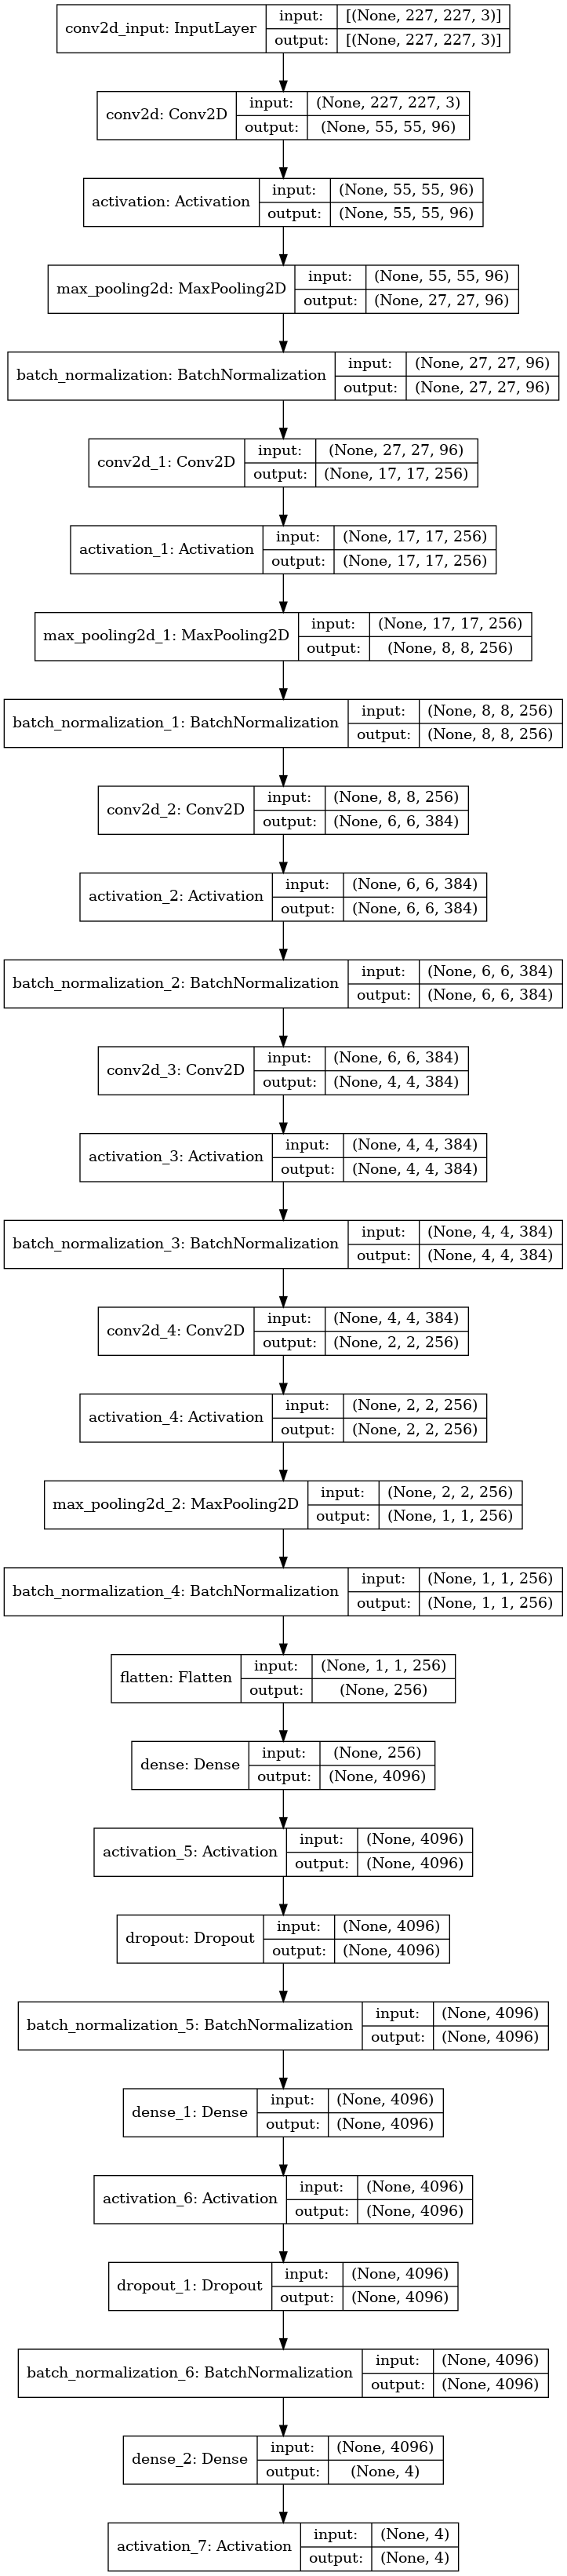

In [16]:
import tensorflow as tf
tf.keras.utils.plot_model(model, './alex_model.png', show_shapes = True)

In [17]:
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [18]:
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch/20))

In [20]:
model.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy",sensitivity,specificity])

model_history = model.fit(train_dataset,
                         epochs = 20,
                         validation_data = test_dataset,callbacks = [lr_callback])


Epoch 1/20
625/625 [==============================] - 53s 80ms/step - loss: 1.7907 - accuracy: 0.3056 - sensitivity: 0.2131 - specificity: 0.8478 - val_loss: 1.1688 - val_accuracy: 0.4804 - val_sensitivity: 0.2550 - val_specificity: 0.9536
Epoch 2/20
625/625 [==============================] - 51s 80ms/step - loss: 1.6438 - accuracy: 0.3682 - sensitivity: 0.2728 - specificity: 0.8571 - val_loss: 1.0044 - val_accuracy: 0.5682 - val_sensitivity: 0.3649 - val_specificity: 0.9469
Epoch 3/20
625/625 [==============================] - 51s 80ms/step - loss: 1.5098 - accuracy: 0.4179 - sensitivity: 0.3328 - specificity: 0.8658 - val_loss: 0.8859 - val_accuracy: 0.6353 - val_sensitivity: 0.4758 - val_specificity: 0.9469
Epoch 4/20
625/625 [==============================] - 53s 83ms/step - loss: 1.4064 - accuracy: 0.4571 - sensitivity: 0.3816 - specificity: 0.8721 - val_loss: 0.7708 - val_accuracy: 0.6890 - val_sensitivity: 0.5575 - val_specificity: 0.9462
Epoch 5/20
625/625 [====================

In [42]:
history = model_history.history
def plot_metrics(history):
  
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    train_sensitivity = history['sensitivity']
    train_specificity = history['specificity']
    val_sensitivity = history['val_sensitivity']
    val_specificity = history['val_specificity']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()
    
    # sensitivity
    plt.figure()
    plt.plot(train_sensitivity, label='Training sensitivity')
    plt.plot( val_sensitivity, label='Validation sensitivity')
    plt.title('sensitivity')
    plt.ylabel('sensitivity')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()
    
     # specificity
    plt.figure()
    plt.plot(train_specificity, label='Training specificity')
    plt.plot(val_specificity, label='Validation specificity')
    plt.title('specificity')
    plt.ylabel('specificity')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

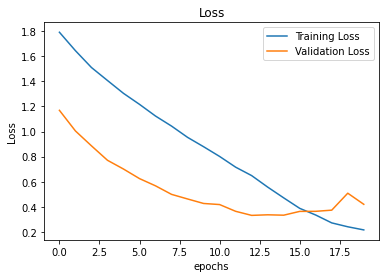

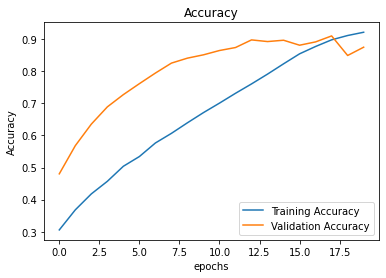

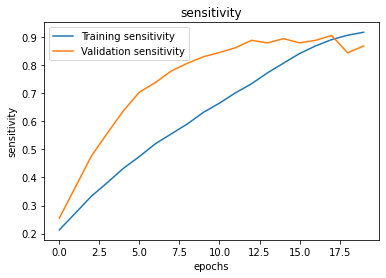

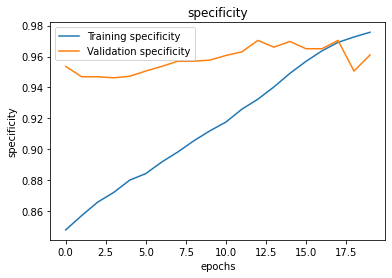

In [43]:
plot_metrics(history)

In [44]:
# serialize model to JSON
from tensorflow.keras.models import model_from_json
model_in_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_in_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [45]:
pred_probs = model.predict(test_data, verbose=1)
pred_probs[0], pred_probs[0].argmax

31/31 [==============================] - 2s 45ms/step


(array([5.7245887e-07, 2.1477366e-05, 9.6984743e-04, 9.9900812e-01],
       dtype=float32),
 <function ndarray.argmax>)

In [46]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([3, 1, 2, 2, 1, 0, 2, 1, 2, 0])

In [47]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
    y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10]

[2, 0, 3, 2, 2, 2, 0, 3, 0, 0]

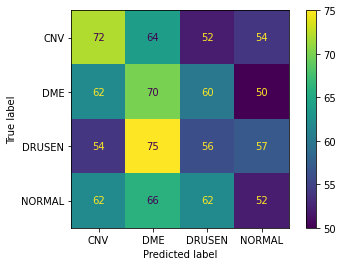

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_labels, pred_classes, labels = [0, 1, 2, 3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = train_data.class_names)
disp.plot()

In [49]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  #"""Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channel)."""
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  #img = img/255.
  return img

In [50]:
class_names = train_data.class_names
print(class_names)

['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [51]:
def pred_and_plot(model, filename, class_names):
  #"""Imports an image located at filename, makes a prediction on it with a trained model and plots the image with the predicted class as the title."""
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  plt.imshow(img/255.)
  plt.show()
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred, tf.argmax(pred, axis = 1))
  # Get the predicted class
  pred_class = class_names[tf.argmax(pred, axis = 1).numpy()[0]]
  # Plot the image and predicted class
  #plt.imshow(img/255.)
  #plt.title(f"Prediction: {pred_class}")
  print(f"Prediction: {pred_class}")
  plt.axis(False);

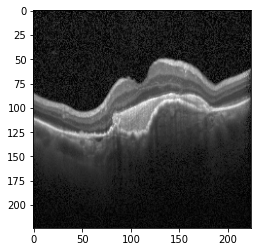

[[9.9989223e-01 7.7191806e-05 1.7848401e-05 1.2656665e-05]] tf.Tensor([0], shape=(1,), dtype=int64)
Prediction: CNV


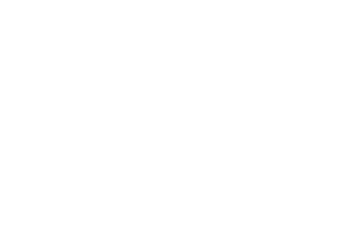

In [52]:
file_name1="./dataset/test/CNV/CNV-5536678-2.jpeg"
pred_and_plot(model,file_name1,class_names)

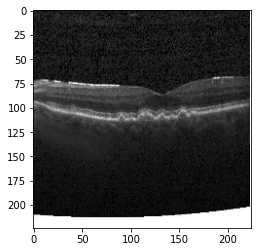

[[7.9575297e-04 8.7892568e-06 9.9897599e-01 2.1943885e-04]] tf.Tensor([2], shape=(1,), dtype=int64)
Prediction: DRUSEN


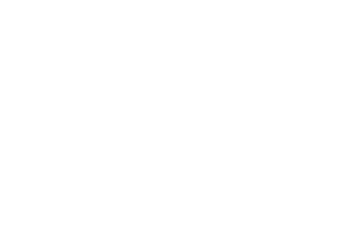

In [53]:
file_name2="./dataset/test/DRUSEN/DRUSEN-609387-1.jpeg"
pred_and_plot(model,file_name2,class_names)

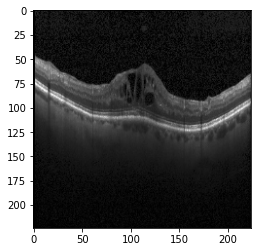

[[2.3561583e-03 9.9764365e-01 8.3559385e-08 3.8352933e-08]] tf.Tensor([1], shape=(1,), dtype=int64)
Prediction: DME


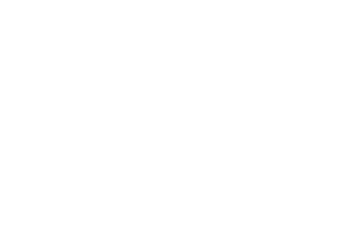

In [54]:
file_name3="./dataset/test/DME/DME-30521-3.jpeg"
pred_and_plot(model,file_name3,class_names)

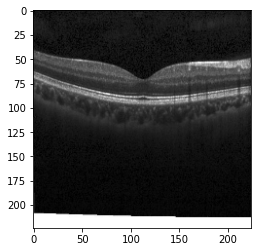

[[7.8924251e-04 2.9559817e-02 4.3522101e-03 9.6529883e-01]] tf.Tensor([3], shape=(1,), dtype=int64)
Prediction: NORMAL


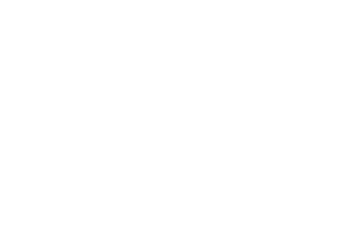

In [55]:
file_name3="./dataset/test/NORMAL/NORMAL-2973935-1.jpeg"
pred_and_plot(model,file_name3,class_names)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes,target_names=class_names))

              precision    recall  f1-score   support

         CNV       0.29      0.30      0.29       242
         DME       0.25      0.29      0.27       242
      DRUSEN       0.24      0.23      0.24       242
      NORMAL       0.24      0.21      0.23       242

    accuracy                           0.26       968
   macro avg       0.26      0.26      0.26       968
weighted avg       0.26      0.26      0.26       968



In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_labels, pred_classes)
accuracy_score(y_labels, pred_classes, normalize=False)

250

In [58]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in [0,1,2,3]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_labels)==l,
                                                      np.array(pred_classes)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])

In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_labels,pred_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.258264


In [60]:
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

,class,sensitivity,specificity
0,0,0.754821,0.297521
1,1,0.717631,0.289256
2,2,0.760331,0.231405
3,3,0.778237,0.214876
